# 1) Basis verkennende data analyse
Welkom bij dit notebook waarin we een verkennende analyse uitvoeren op een subset van de Student Performance dataset. Deze dataset bevat informatie over de prestaties van studenten op Portugese scholen.

Het primaire doel van deze analyse is om een dieper inzicht te krijgen in de dataset zonder ons te richten op specifieke onderzoeksvragen. We houden echter in gedachten dat we de dataset mogelijk willen gebruiken voor toekomstige machine learning-toepassingen.

Om de analyse gestructureerd uit te voeren, volgen we een systematische aanpak door te kijken naar de volgende onderwerpen:

- Data en Data Dictionary
- Onderzoek van categorische variabelen
- Onderzoek van relaties tussen categorische variabelen


## 2)	Data en data dictionary
Als eerst ga ik de libraries importen en de data inlezen van het student performance dataset. Dit is een cruciale stap omdat we de data nodig hebben voor verdere analyses en omdat de libraries ons flink gaat helpen met de analyses

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
student_performance_data = pd.read_csv("student_performance_basis.csv" ,sep=';')

In [3]:
student_performance_data

,age,sex,Medu,Fedu,reason,absences,G1,G3
0,18,F,4,4,course,6,5,6
1,17,F,1,1,course,4,5,6
2,15,F,1,1,other,10,7,10
3,15,F,4,2,home,2,15,15
4,16,F,3,3,home,4,6,10
...,...,...,...,...,...,...,...,...
1039,19,F,2,3,course,4,10,10
1040,18,F,3,1,course,4,15,16
1041,18,F,1,1,course,6,11,9
1042,17,M,3,1,course,6,10,10


In [4]:
student_performance_data.shape

(1044, 8)

In [5]:
list(student_performance_data)

['age', 'sex', 'Medu', 'Fedu', 'reason', 'absences', 'G1', 'G3']

In [6]:
student_performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1044 non-null   int64 
 1   sex       1044 non-null   object
 2   Medu      1044 non-null   int64 
 3   Fedu      1044 non-null   int64 
 4   reason    1044 non-null   object
 5   absences  1044 non-null   int64 
 6   G1        1044 non-null   int64 
 7   G3        1044 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 65.4+ KB


In [7]:
student_performance_data.isnull().sum()

age         0
sex         0
Medu        0
Fedu        0
reason      0
absences    0
G1          0
G3          0
dtype: int64

De data ziet er goed uit. Ook zijn er geen waardes die missen. 

### Dataset Beschrijving
De dataset bevat de volgende variabelen:

- **Leeftijd (age):** De leeftijd van het individu.
- **Geslacht (sex):** Het geslacht van het individu.
- **Moeder Onderwijs (Medu):** Het niveau van onderwijs van de moeder.
- **Vader Onderwijs (Fedu):** Het niveau van onderwijs van de vader.
- **Reden (reason):** De reden voor het kiezen van de school.
- **Afwezigheden (absences):** Het aantal gemiste schooldagen.
- **G1 (Eerste termijn cijfer):** Het cijfer behaald in de eerste termijn.
- **G3 (Eindcijfer):** Het uiteindelijke cijfer aan het einde van het schooljaar.

### Data Dictionary

Laten we beginnen met het bekijken van de data dictionary om een beter begrip te krijgen van de variabelen in de dataset.

| Variabele naam | Datatype | Numeriek/Categorisch | Soort variabele | Toelichting |
|----------------|----------|-----------------------|-----------------|-------------|
| age            | Integer  | Numeriek              | Ratio           | Leeftijd van het individu |
| sex            | String   | Categorisch          | Nominaal        | Geslacht van het individu ('M' of 'V') |
| Medu           | Integer  | Categorisch              | Ordinaal        | Niveau van moeder's onderwijs: 0 (geen) tot 4 (hoger onderwijs) |
| Fedu           | Integer  | Categorisch              | Ordinaal        | Niveau van vader's onderwijs: 0 (geen) tot 4 (hoger onderwijs) |
| reason         | String   | Categorisch          | Nominaal        | Reden voor het kiezen van de school: 'dichtbij', 'school', 'reputatie', 'andere' |
| absences       | Integer  | Numeriek              | Ratio           | Aantal gemiste schooldagen |
| G1             | Integer  | Numeriek              | Ratio           | Cijfer behaald in de eerste termijn |
| G3             | Integer  | Numeriek              | Ratio           | Eindcijfer aan het einde van het schooljaar |


# 3)	Afzonderlijke variabelen
In deze stap ga ik de afzonderlijke variabelen bekijken. 
Het is daarbij nodig om een onderscheid te maken tussen categorische variabelen en numerieke variabelen. In mijn data dictionary is terug te lezen of een variabele numeriek of categorisch is.


In [8]:
categorisch_var = ["sex", "reason", "Medu", "Fedu"]
numeriek_var = ['age', 'absences', 'G1', 'G3']

Nu we de afzonderlijke variabelen hebben onderscheiden, gaan we nu als eerst alle categorische variabelen bekijken

#### sex

In [9]:
student_performance_data["sex"].value_counts()

F    591
M    453
Name: sex, dtype: int64

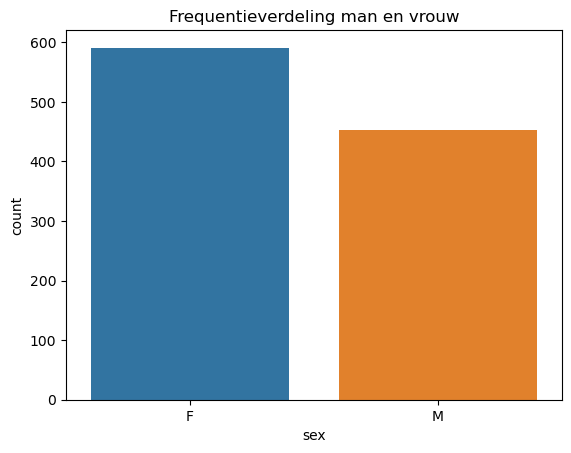

In [10]:
sns.countplot(data=student_performance_data, x="sex")
plt.title("Frequentieverdeling man en vrouw")
plt.show()

We zien hier de verhouding tussen F(Female) en M(Male). We zien dat er bijna 600 vrouwen zijn en rond de 450 mannen

#### reason

In [11]:
student_performance_data["reason"].value_counts()

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64

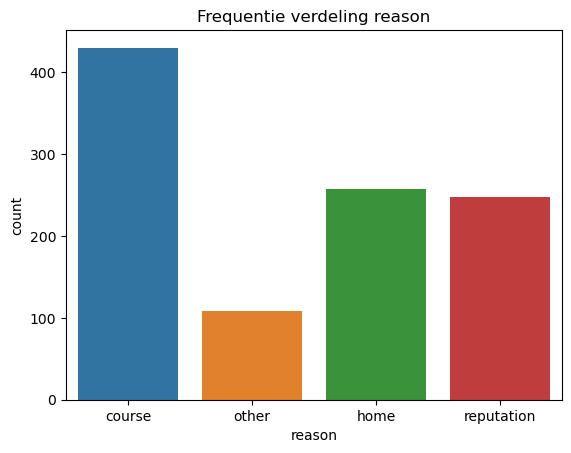

In [12]:
sns.countplot(data=student_performance_data, x="reason")
plt.title("Frequentie verdeling reason")
plt.show()

De grafiek hierboven is te zien dat welke 4 redenen mensen hebben voor het kiezen van school. We zien dat course de grootste reden is. bijna 450 mensen hebben om deze reden gekozen voor de school. Nummer 2 is home en nummer 3 is reputation. rond de 100 mensen hebben gekozen voor deze school voor andere redenen.

#### Medu

In [13]:
student_performance_data["Medu"].value_counts()

4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64

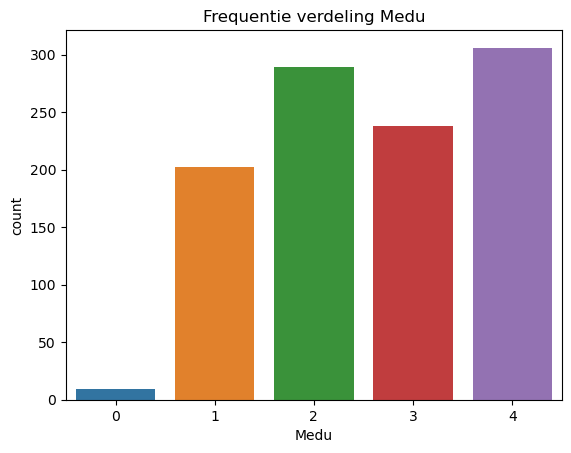

In [14]:
sns.countplot(data=student_performance_data, x="Medu")
plt.title("Frequentie verdeling Medu")
plt.show()

De grafiek toont de 5 onderwijs niveaus van de moeders weer. We zien dat 0 het minst is en nummer 4 het meeste. De 2e is nummer 2.

#### Fedu

In [15]:
student_performance_data["Fedu"].value_counts()

2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64

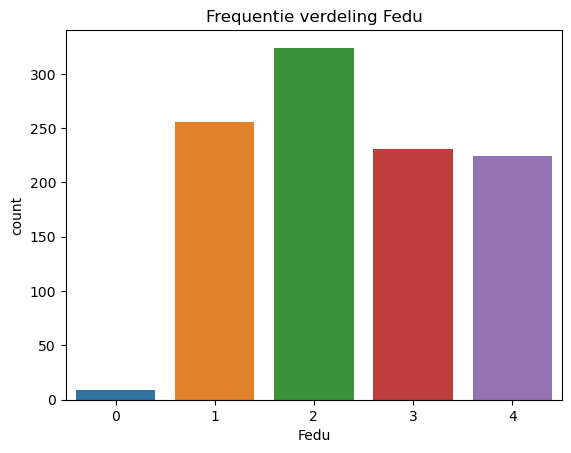

In [16]:
sns.countplot(data=student_performance_data, x="Fedu")
plt.title("Frequentie verdeling Fedu")
plt.show()

De grafiek toont de 5 onderwijs niveaus van de vader weer. We zien ook hier dat nummer 0 het minst is. Hier zien we ook dan nummer 2 het meeste voorkomt en nummer 1 als 2e meeste.

## numerieke variabelen
#### age

In [17]:
leeftijd_statistieken = student_performance_data['age'].describe()
print(leeftijd_statistieken)

count    1044.000000
mean       16.726054
std         1.239975
min        15.000000
25%        16.000000
50%        17.000000
75%        18.000000
max        22.000000
Name: age, dtype: float64


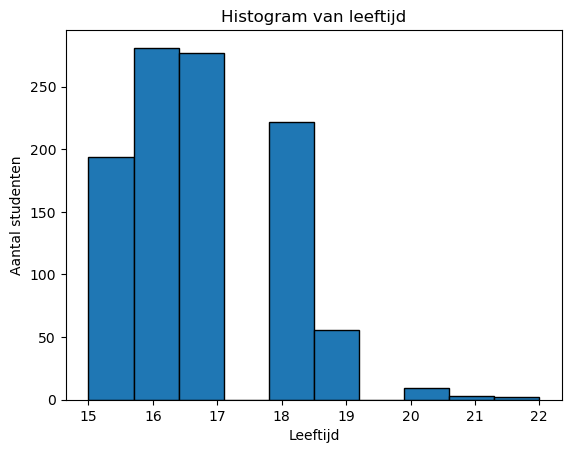

In [18]:
plt.hist(student_performance_data['age'], bins = 10, edgecolor = 'black')
plt.title('Histogram van leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal studenten')
plt.show()

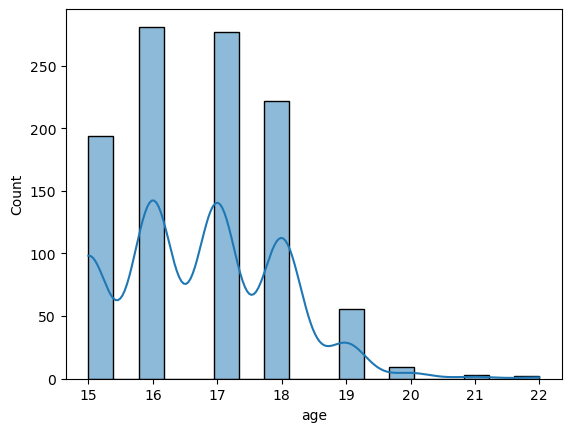

In [19]:
sns.histplot(student_performance_data['age'], kde=True)
plt.show()

<AxesSubplot:xlabel='ageLog', ylabel='Count'>

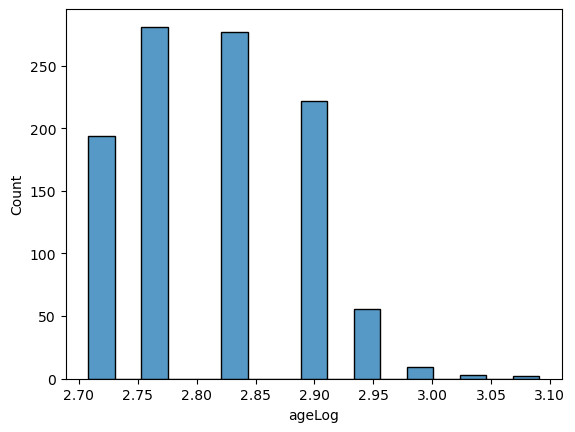

In [20]:
data_copy = student_performance_data.copy()
data_copy["ageLog"] = np.log(data_copy["age"])
sns.histplot(data_copy, x="ageLog")

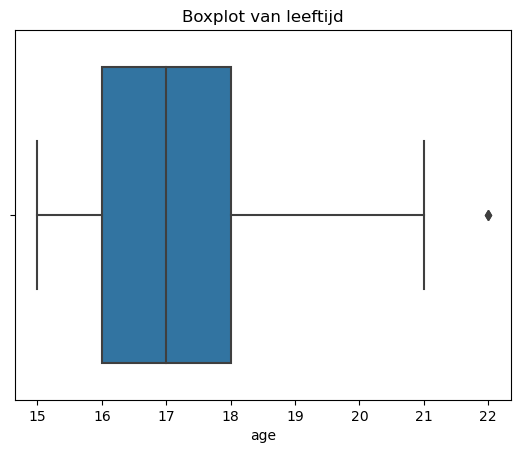

In [21]:
sns.boxplot(data=student_performance_data, x='age')
plt.title('Boxplot van leeftijd')
plt.show()

#### absences

In [22]:
absences_statistieken = student_performance_data['absences'].describe()
print("Statistieken voor 'absences':")
print(absences_statistieken)

Statistieken voor 'absences':
count    1044.000000
mean        4.434866
std         6.210017
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        75.000000
Name: absences, dtype: float64


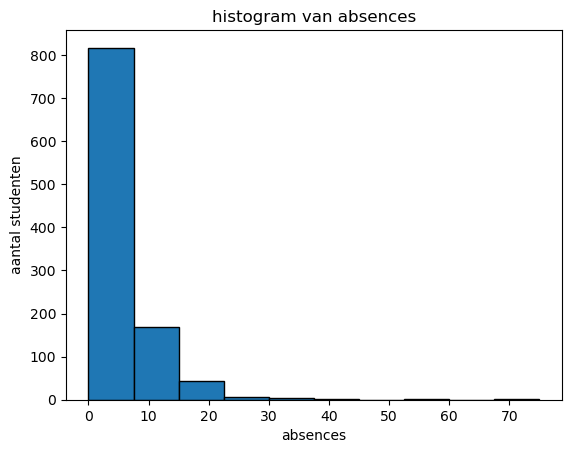

In [23]:
plt.hist(student_performance_data['absences'], bins = 10, edgecolor = 'black')
plt.title('histogram van absences')
plt.xlabel('absences')
plt.ylabel('aantal studenten')
plt.show()

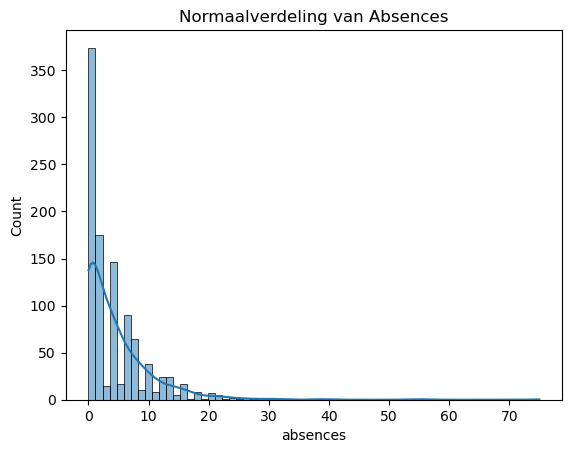

In [24]:
sns.histplot(student_performance_data['absences'],kde=True)
plt.title('Normaalverdeling van Absences')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='absencesLog', ylabel='Count'>

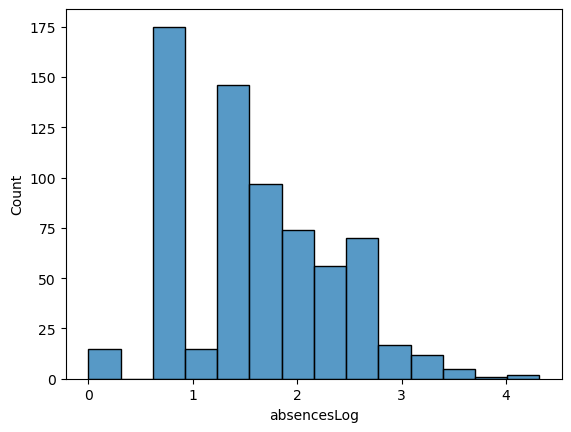

In [25]:
data_copy["absencesLog"] = np.log(data_copy["absences"])
sns.histplot(data_copy, x="absencesLog")

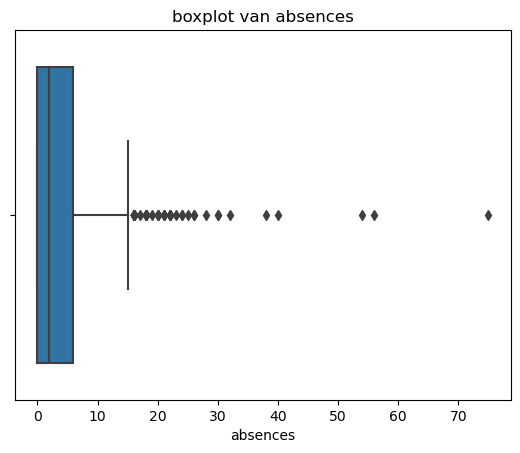

In [26]:
sns.boxplot(data = student_performance_data, x = 'absences')
plt.title('boxplot van absences')
plt.show()

#### G1

In [27]:
G1_statistieken = student_performance_data['G1'].describe()
print("Statistieken van 'G1':")
print(G1_statistieken)

Statistieken van 'G1':
count    1044.000000
mean       11.213602
std         2.983394
min         0.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        19.000000
Name: G1, dtype: float64


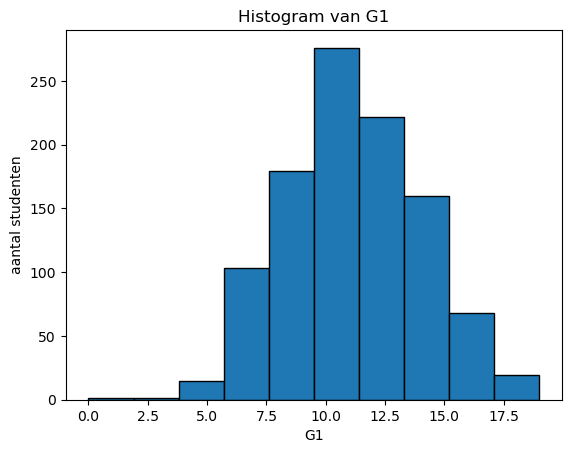

In [28]:
plt.hist(student_performance_data['G1'],bins=10, edgecolor='black')
plt.title('Histogram van G1')
plt.xlabel('G1')
plt.ylabel('aantal studenten')
plt.show()

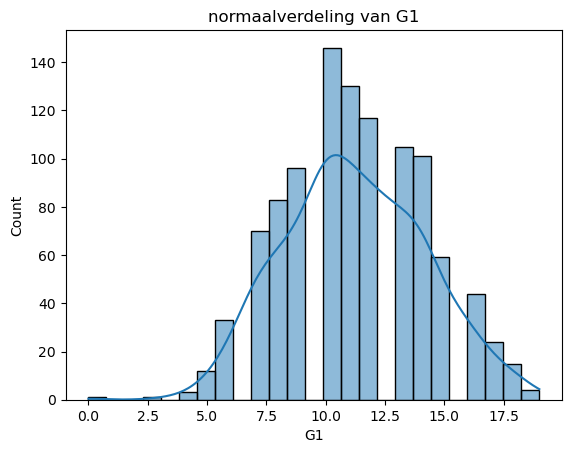

In [29]:
sns.histplot(student_performance_data['G1'],kde=True)
plt.title('normaalverdeling van G1')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='G1Log', ylabel='Count'>

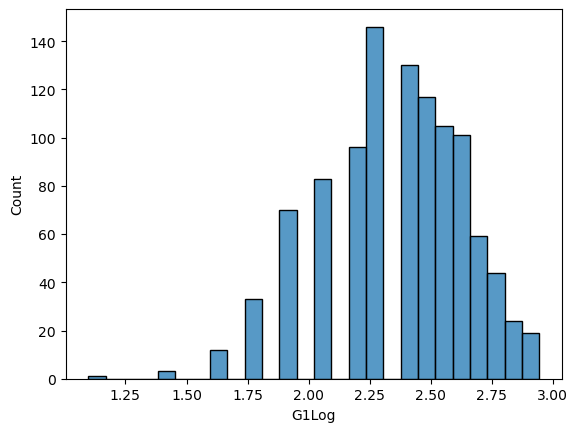

In [30]:
data_copy["G1Log"] = np.log(data_copy["G1"])
sns.histplot(data_copy, x="G1Log")

<AxesSubplot:xlabel='G1'>

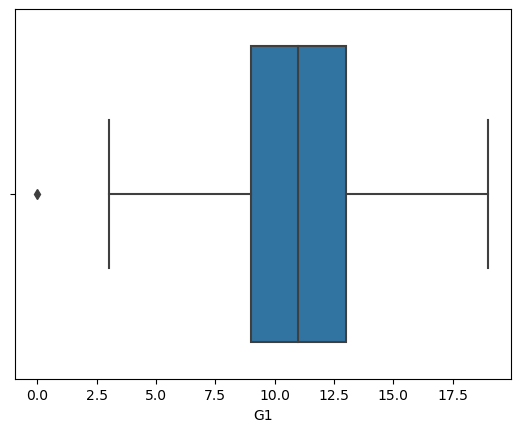

In [31]:
sns.boxplot(data=student_performance_data, x='G1')

#### G3

In [32]:
G3_statistieken = student_performance_data['G3'].describe()
print("statistieken voor 'G3':")
print(G3_statistieken)

statistieken voor 'G3':
count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64


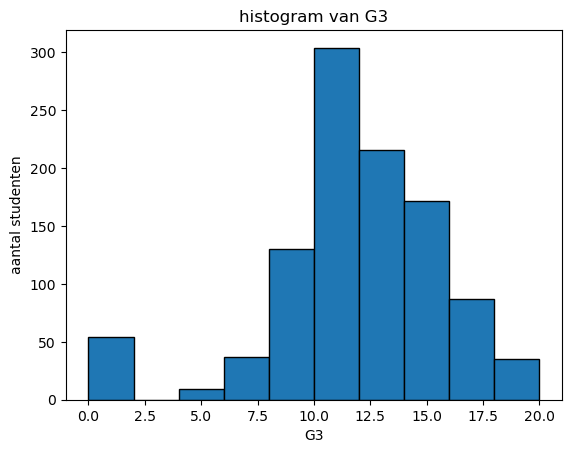

In [33]:
plt.hist(student_performance_data['G3'], bins=10, edgecolor = 'black')
plt.title('histogram van G3')
plt.xlabel('G3')
plt.ylabel('aantal studenten')
plt.show()

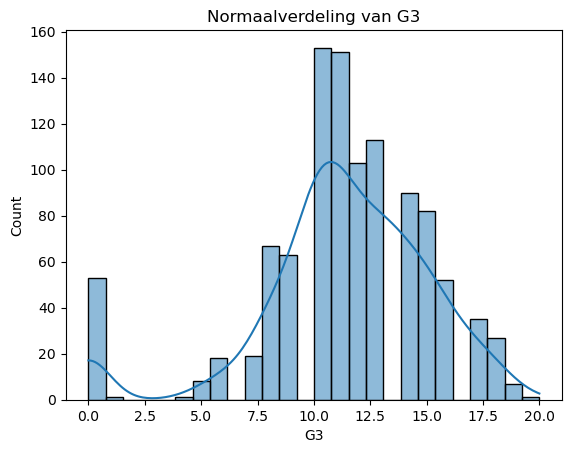

In [34]:
sns.histplot(student_performance_data['G3'], kde=True)
plt.title('Normaalverdeling van G3')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='G3Log', ylabel='Count'>

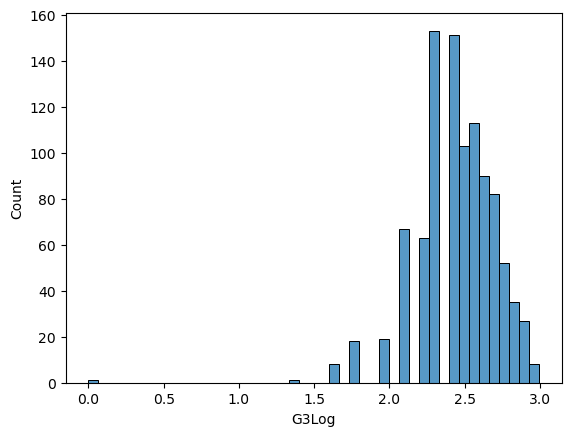

In [35]:
data_copy["G3Log"] = np.log(data_copy["G3"])
sns.histplot(data_copy, x="G3Log")

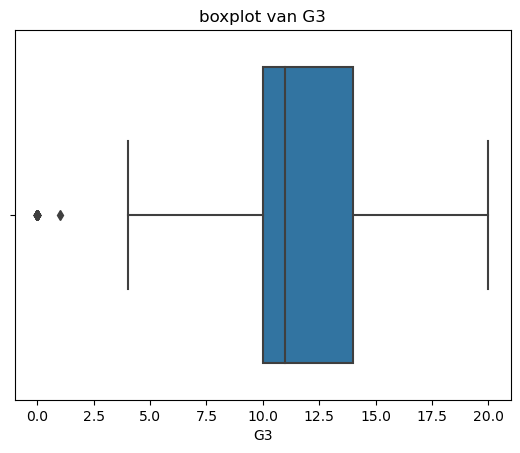

In [36]:
sns.boxplot(data=student_performance_data, x='G3')
plt.title('boxplot van G3')
plt.show()

# 4)	Relaties tussen variabelen
In deze stap gaan we kijken naar de relaties tussen variabelen. We kijken iedere keer naar tweetallen. Het is nodig onderscheid te maken tussen de verschillende mogelijke combinaties van numerieke en categorische variabelen. 

## relaties tussen categorische variabelen
We gaan als eerst kijken naar tweetallen van categorische variabelen. Ik heb hieronder gekozen voor sex en reason. 

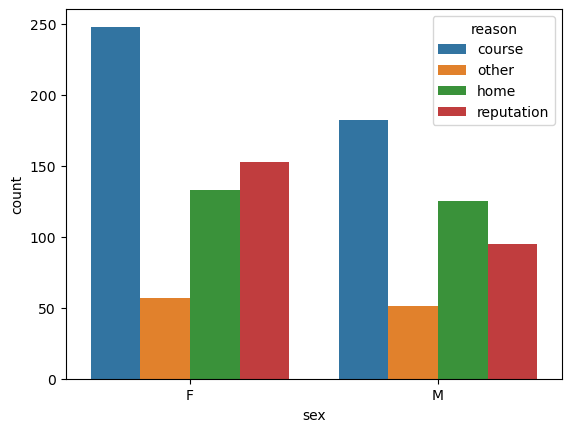

In [37]:
sns.countplot(x='sex', hue='reason', data=student_performance_data)
plt.show()

We zien de verschillende redenen waarom er voor deze school is gekozen tussen man en vrouw.

Met een kruistabel kunnen we de afhankelijkheid van sex en Medu uit te drukken in getallen

In [38]:
crosstable = pd.crosstab(student_performance_data["sex"], student_performance_data["reason"])
crosstable

reason,course,home,other,reputation
sex,,,,
F,248,133,57,153
M,182,125,51,95


In [39]:
chi2_stat, p_value, dof, expected = chi2_contingency(crosstable)
print("Chi-kwadraad test:", chi2_stat)
print("p-waarde",p_value)

Chi-kwadraad test: 6.142082792691987
p-waarde 0.10489853310129428


Er is waarschijnlijk sprake van afhankelijk omdat de p-waarde zo laag is.

## relaties tussen tweetallen numerieke variabelen
Voor nummerieke waardes is het makkelijk om een overzicht te maken van alle mogelijke combinaties met een pairplot

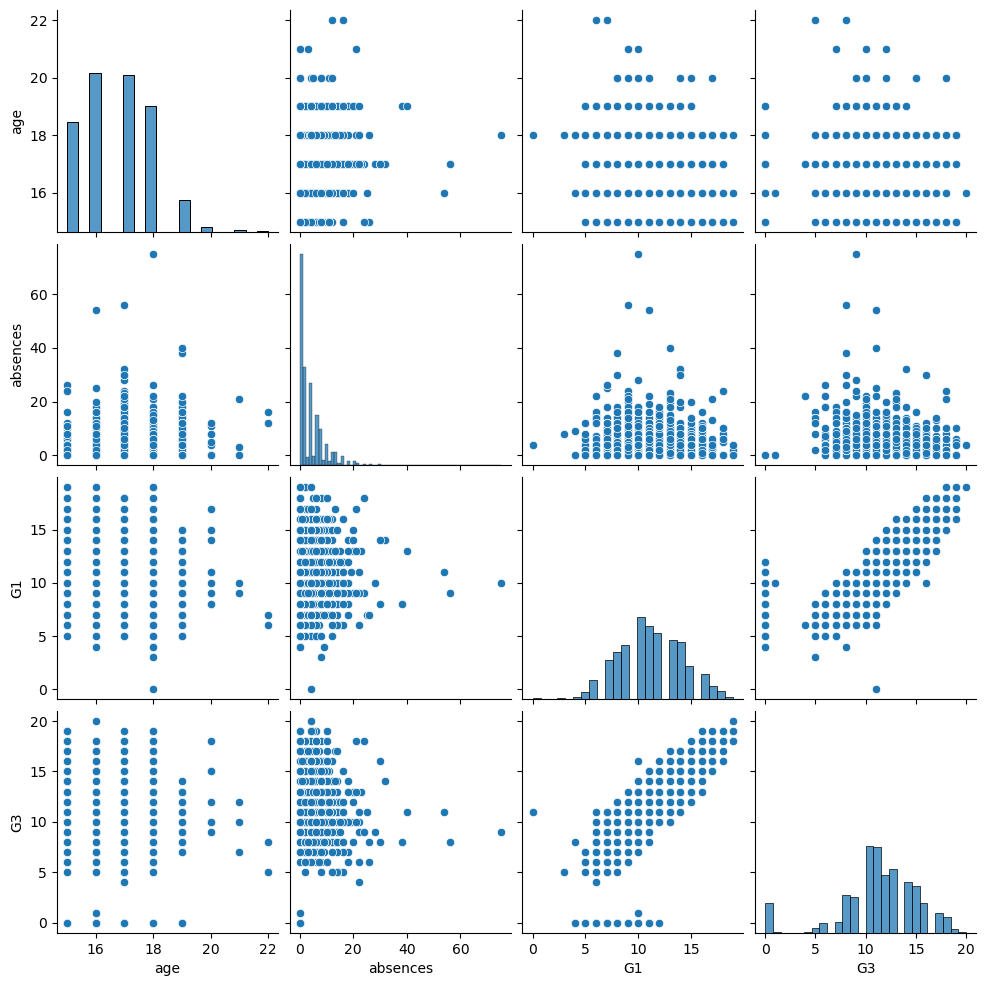

In [40]:
sns.pairplot(student_performance_data[numeriek_var])

Ook is het handig om een overzicht te maken met een correlatiematrix

In [41]:
corr_matrix = student_performance_data[numeriek_var].corr()
corr_matrix

,age,absences,G1,G3
age,1.000000,0.153196,-0.124121,-0.125282
absences,0.153196,1.000000,-0.092425,-0.045671
G1,-0.124121,-0.092425,1.000000,0.809142
G3,-0.125282,-0.045671,0.809142,1.000000


We zien uit de matrix dat de G1 en G3 een hoge correlatie hebben. Nu is het handig om dit te bekijken in een regplot

<AxesSubplot:xlabel='G1', ylabel='G3'>

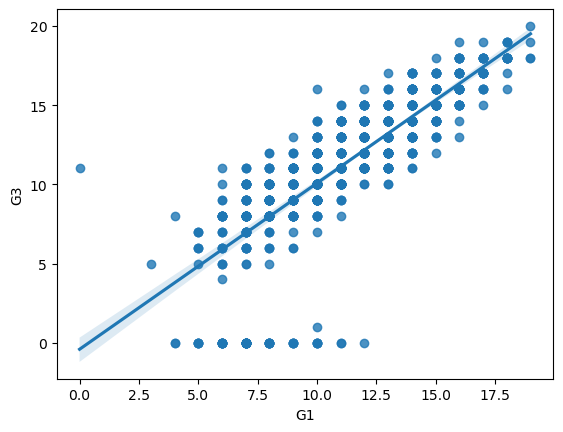

In [42]:
sns.regplot(data=student_performance_data, x="G1", y="G3")

De punten liggen dichtbij de lijn. We zien dus dat er hoge correlatie tussen G1 en G3 is

In [43]:
r2 = student_performance_data["G3"].corr(student_performance_data["G1"])**2
r2

0.6547103239186215

Als bonus heb ik de R2 berekend. Een hoge R2 geeft aan dat er een aanzienlijke invloed is van G1 op G3.

### Tweetallen met een numerieke en een categorische waarde

#### Medu en G3

In [44]:
print(categorisch_var)
print(numeriek_var)

['sex', 'reason', 'Medu', 'Fedu']
['age', 'absences', 'G1', 'G3']


<AxesSubplot:xlabel='sex', ylabel='G3'>

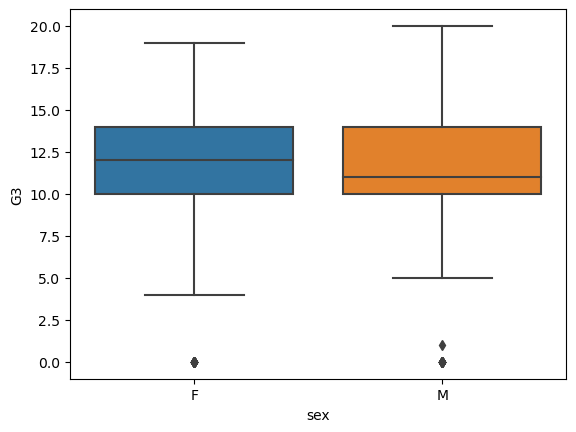

In [45]:
sns.boxplot(data=student_performance_data, x="sex", y="G3")

We zien dat de mediaan van de eindcijfers bij meisjes iets hoger ligt dan bij jongens. Dit laat zien dat meiden iets beter presteren dan jongens

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

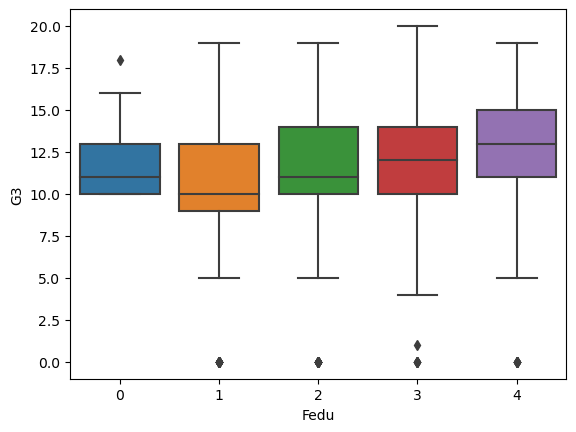

In [46]:
sns.boxplot(data=student_performance_data, x="Fedu", y="G3")

We zien dat de mediaan van de eindcijfers hoger ligt bij mensen waarvan hun vaders het hoogste educatie niveau hebben gehad 

<AxesSubplot:xlabel='Medu', ylabel='G3'>

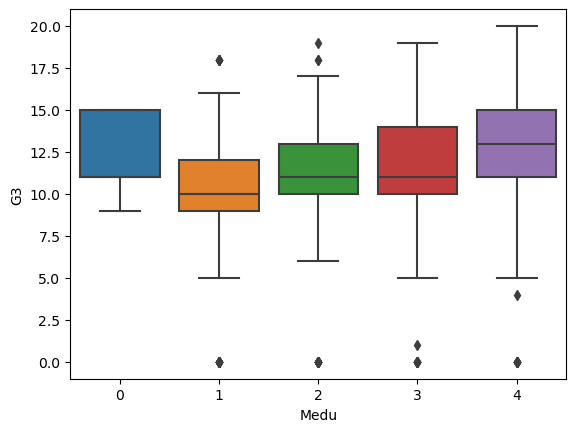

In [47]:
sns.boxplot(data=student_performance_data, x="Medu", y="G3")

We zien dat de mediaan van de eindcijfers hoger ligt bij mensen waarvan hun moeders het hoogste educatie niveau hebben gehad 

# 5)	Afronding
### Conclusie
- Er zijn 600 vrouwen en 450 mannen
- Moeders niveau zit het vaakst op niveau 4 en de vaders niveau zit het vaakst op niveau 2
- Studenten zijn 16 t/m 18 jaar
- in G3 presteren de leerlingen beter dan G1
- Mediaan van eindcijfers ligt hoger bij meisjes dan jongens
- Studenten met ouders die een hoge educatie niveau hebben presteren beter